In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
%matplotlib inline


In [166]:
#read data
read_data=pd.read_excel('Credit Card Customer Data.xlsx')
read_data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Qn. 1,2,3,4 . EDA ,univariate analysis,visualizations/insights

In [167]:
# get a sense of data
read_data.info() # check for non null values and type


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [168]:
# drop irrelevant columns
data=read_data.drop(columns=["Sl_No","Customer Key"],axis=1)
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [169]:
# 5 point summary
print(data.describe())
data

       Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000           4.000000   
max       200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000   

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


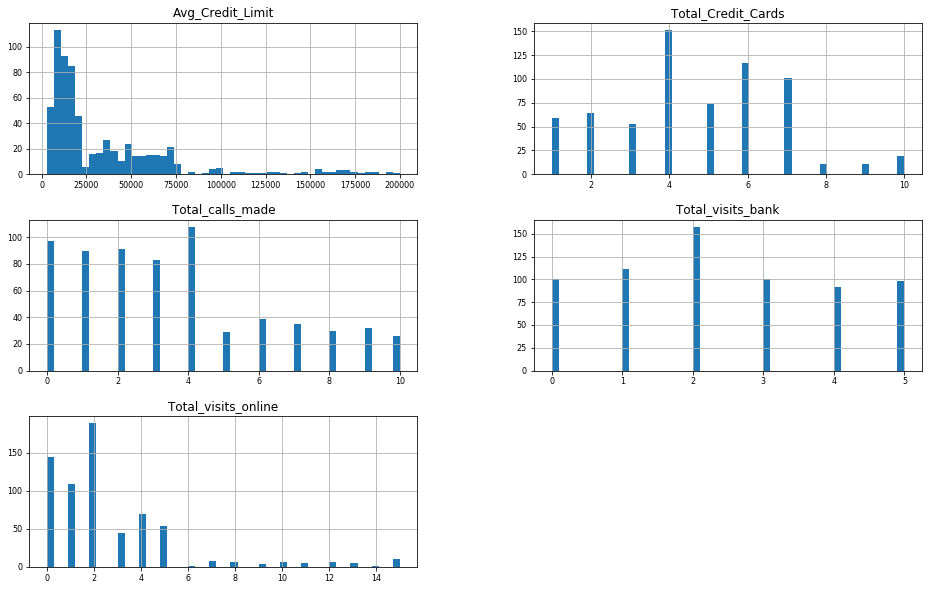

In [170]:
# for a change use pandas for histograms
data.hist(figsize=(16, 10), bins=50, xlabelsize=8, ylabelsize=8);


looks like there are 4 peaks and hence 4 clusters would be required


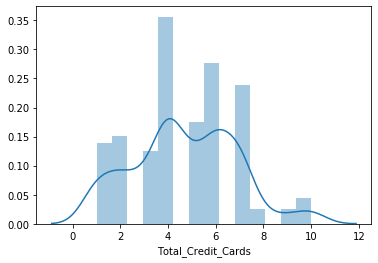

In [171]:
sns.distplot(data['Total_Credit_Cards']);
print("looks like there are 4 peaks and hence 4 clusters would be required")

looks like there are 4 peaks and hence 4 clusters would be required


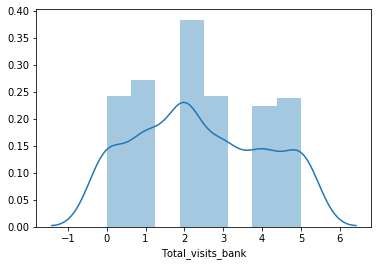

In [172]:
sns.distplot(data['Total_visits_bank']);
print("looks like there are 4 peaks and hence 4 clusters would be required")

looks like there are 4 peaks and hence 4 clusters would be required


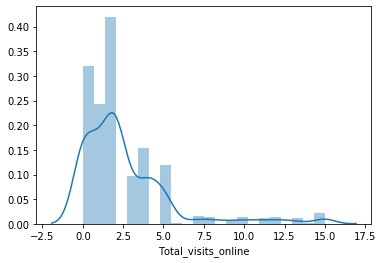

In [173]:
sns.distplot(data['Total_visits_online'])
print("looks like there are 4 peaks and hence 4 clusters would be required")

inference: more credit limit has got positive relationship with total no of credit cards, but no evidence of visits to bank, so may be online visits


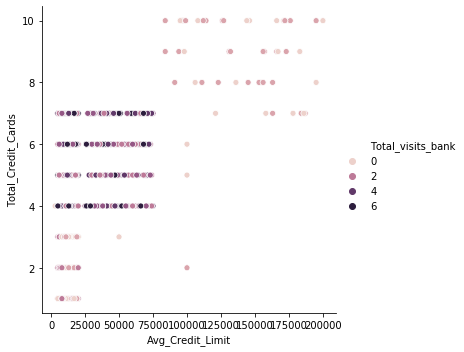

In [174]:
sns.relplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", hue="Total_visits_bank", data=read_data);
print('inference:','more credit limit has got positive relationship with total no of credit cards, but no evidence of visits to bank, so may be online visits' )


inference: more credit limit has got positive relationship with total no of 
credit card and are online visits


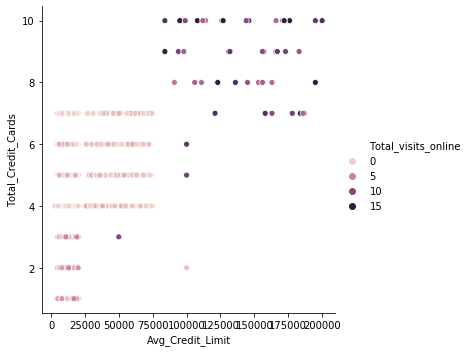

In [175]:
sns.relplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", hue="Total_visits_online", data=read_data);
print('\ninference:','more credit limit has got positive relationship with total no of \ncredit card and are online visits' )



inference: more credit limit has got positive relationship with total no of credit card and no of calls made are in
 the lower credit limit and lesser cards, may be lesser income levels has lesser online access


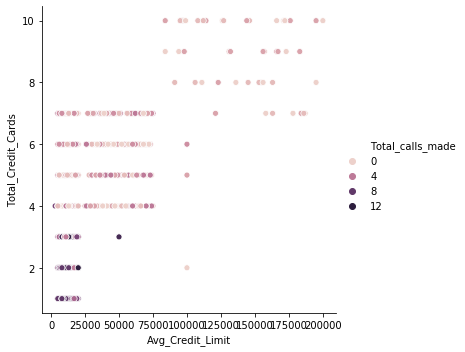

In [176]:
sns.relplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", hue="Total_calls_made", data=read_data);
print('\ninference:','more credit limit has got positive relationship with total no of credit card and no of calls made are in\n the lower credit limit and lesser cards, may be lesser income levels has lesser online access' )

In [177]:

# credit limit and other columns need to be of same measurement
data_scaled=data.apply(zscore)
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [178]:
# correlation matrix
corr_matrix=data_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper)
print('inference: not much correlations - max is around 0.60')

                     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
Avg_Credit_Limit                  NaN             0.60886           0.100312   
Total_Credit_Cards                NaN                 NaN           0.315796   
Total_visits_bank                 NaN                 NaN                NaN   
Total_visits_online               NaN                 NaN                NaN   
Total_calls_made                  NaN                 NaN                NaN   

                     Total_visits_online  Total_calls_made  
Avg_Credit_Limit                0.551385          0.414352  
Total_Credit_Cards              0.167758          0.651251  
Total_visits_bank               0.551861          0.506016  
Total_visits_online                  NaN          0.127299  
Total_calls_made                     NaN               NaN  
inference: not much correlations - max is around 0.60


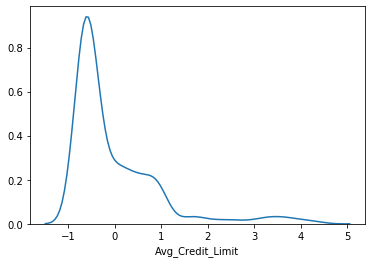

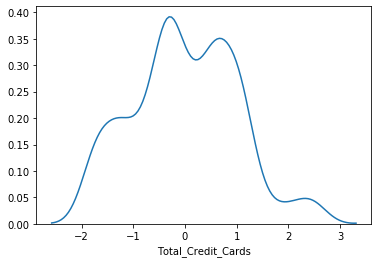

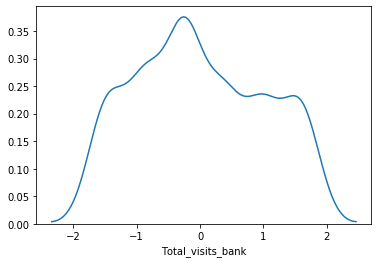

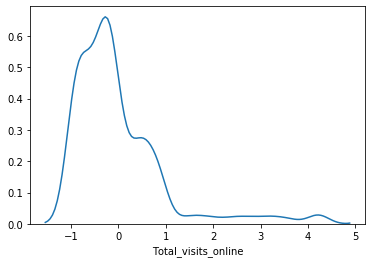

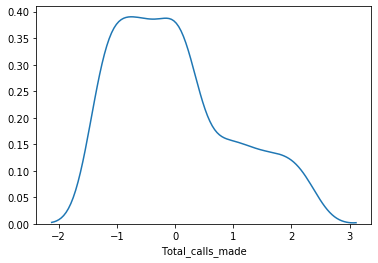

In [179]:
for i in data_scaled.columns:
    sns.distplot(data_scaled[i],hist=False,)
    plt.show()

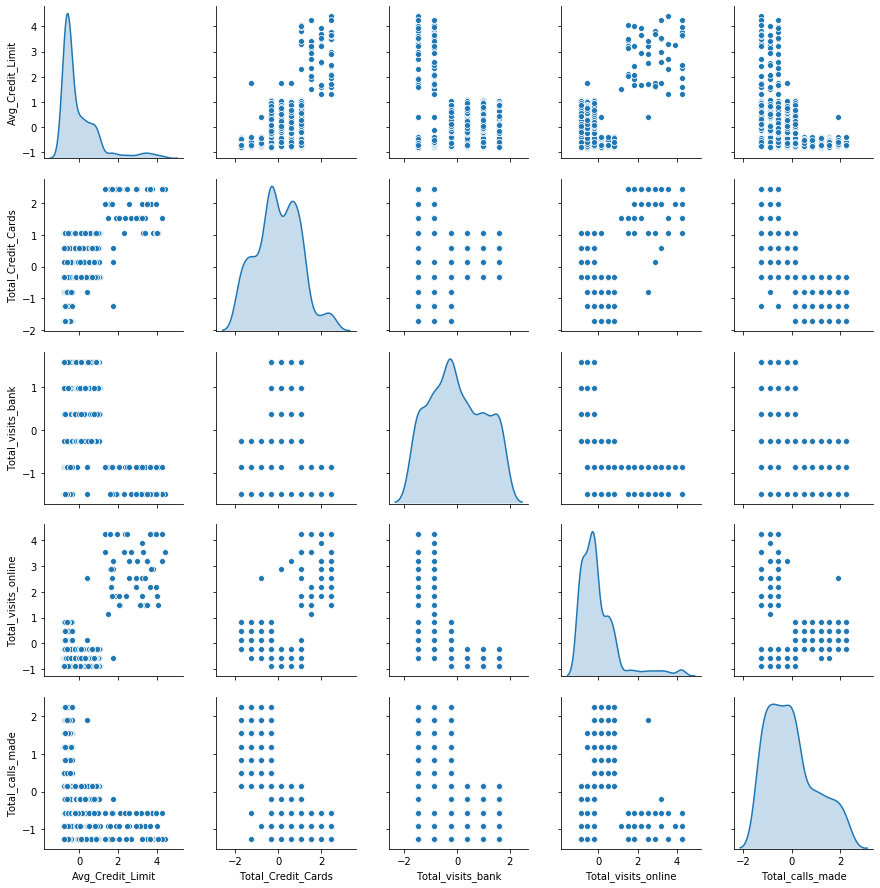

In [180]:
sns.pairplot(data_scaled,diag_kind='kde')

##### The pairplots above says that - in the diagonal kernel plots approx 4-5 peaks present in the variables and perhaps 4-5 clusters would be required.

#### 5. Kmeans,cluster analysis with boxplot

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

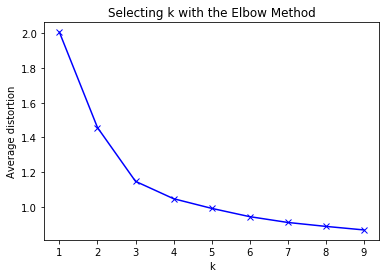

In [181]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters = range(1,10)
mean_distortions= []
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_scaled)
    prediction=model.predict(data_scaled)
    mean_distortions.append(sum
                            (np.min(
                                        cdist(data_scaled,model.cluster_centers_,'euclidean'),axis=1
                                    )
                             )/data_scaled.shape[0]
                           )
plt.plot(clusters, mean_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [182]:
# Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [183]:
final_kmeans_model_3 = kmeans.fit(data_scaled)
prediction=final_kmeans_model_3.predict(data_scaled)

data_scaled


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [184]:

# Calculate the centroids for the columns to profile
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(data_scaled) )
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


In [185]:
#joining the labels with the original and scaled dataframes

data_labelled=data.copy()
data_labelled['labels']=prediction
data_scaled['labels']=prediction
data_labelled
# data_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


In [186]:
data_labelled['labels'].value_counts()  

1    386
0    224
2     50
Name: labels, dtype: int64

In [187]:
data_labelled.head(100)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
95,5000,1,2,5,7,0
96,18000,3,2,3,6,0
97,15000,2,0,5,4,0
98,13000,1,1,4,9,0


In [188]:
data_3_clusters=data_labelled.groupby('labels')
data_3_clusters.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013889148>,
      dtype=object)

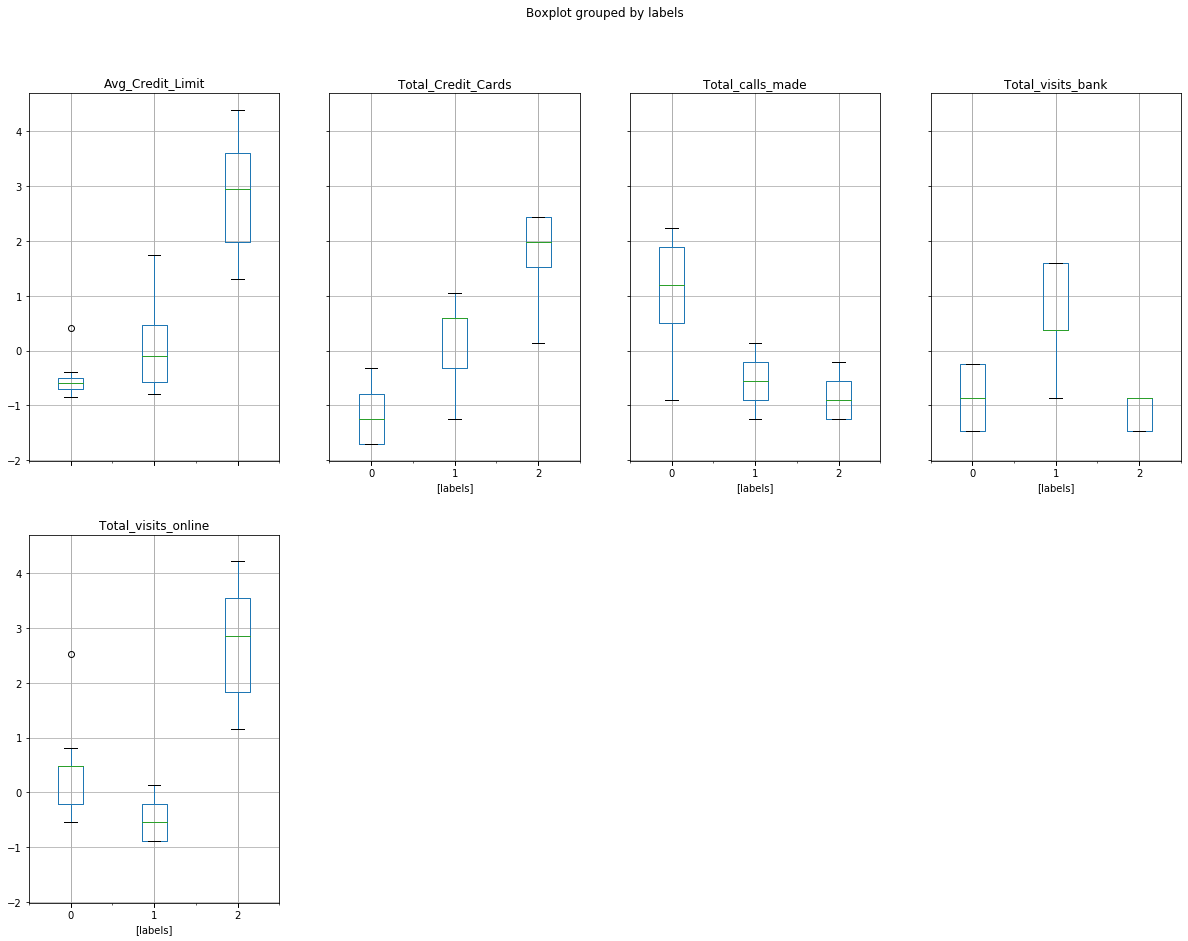

In [189]:
data_scaled.boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

In [190]:
#trial with K=2 did not give evidence of appropriateness of 2 clusters hence commented out

In [191]:
# # Let us try with K = 2
# data_labelled_2=data.copy()
# final_model1=KMeans(2)
# final_model1.fit(data_scaled)
# prediction1=final_model1.predict(data_scaled)

# #Append the prediction 
# data_scaled["GROUP"]=prediction1
# data_labelled_2["GROUP"] = prediction1
# print("Groups Assigned : \n")
# # data_scaled[['Avg_Credit_Limit','GROUP']]
# data_labelled_2

In [192]:
# data_2_clusters=data_labelled_2.groupby(['GROUP'])
# data_2_clusters.mean()

In [193]:
# data_scaled.boxplot(by = 'GROUP',  layout=(2,4), figsize=(20, 15))

In [194]:
# data_scaled['Avg_Credit_Limit'].corr(data_scaled['Total_Credit_Cards'])

In [195]:
# data_scaled['Avg_Credit_Limit'].corr(data_scaled['Total_visits_bank'])

In [196]:
# data_scaled['Avg_Credit_Limit'].corr(data_scaled['Total_visits_online'])

The 3 cluster analysis eliminates all outliers and "Average Credit Card Limit" and "Total Credit Cards" have some positive relationship.
There seems to be 3 prominent segments :<br>
1.high credit limit group who has more credit cards and  prefer online mode, and <br>
2.And medium group with medium credit limit group and has more than one credit card and prefer bank visits/calls<br>
3.Low credit limit group who has fewer credit cards and prefer phone calls


##### 6. Heirarchical clustering with linkages  - dendrogram and cophenetic coefficients analyze with box plots

In [197]:
# generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
z_ward = linkage(data_scaled, 'ward', metric='euclidean')
# cophenetic correlation is the measure of faithfulness of how a dendrogram preserves the pairwise diistance of original data
c1,coph_dists=cophenet(z_ward,pdist(data_scaled))
print('c for ward and euclidean:',c1)

c for ward and euclidean: 0.7566252666432097


In [198]:
z_average = linkage(data_scaled, 'average', metric='euclidean')
c2,coph_dists=cophenet(z_average,pdist(data_scaled))
print('c for average and euclidean:',c2)
z_average[1]

c for average and euclidean: 0.9102691112621796


array([250., 361.,   0.,   2.])

In [199]:
z_complete = linkage(data_scaled, 'complete', metric='euclidean')
c3,coph_dists=cophenet(z_complete,pdist(data_scaled))
print('c for average and euclidean:',c3)

c for average and euclidean: 0.884420725860894


In [200]:
z_single = linkage(data_scaled, 'single', metric='euclidean')
c4,coph_dists=cophenet(z_single,pdist(data_scaled))
print('c for single and euclidean:',c4)

c for single and euclidean: 0.8981791108157512


##### <font color=red> Inference: clearly cophenetic index is more in  average linkage with eulcidean metric 

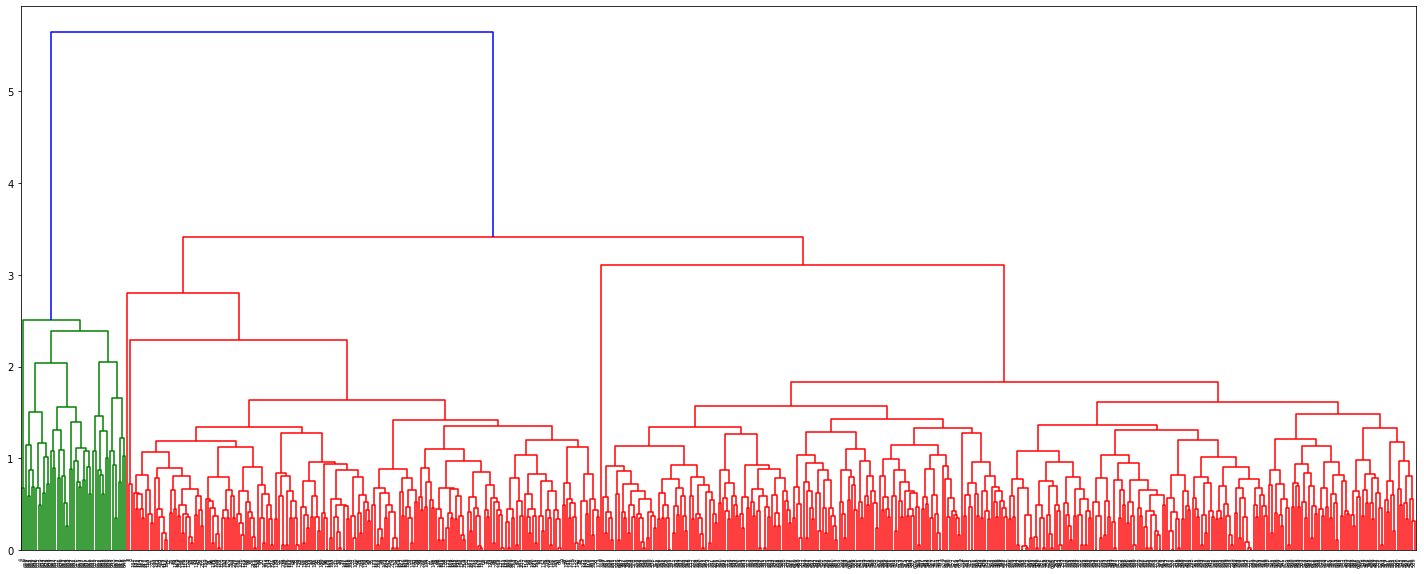

In [201]:
plt.figure(figsize=(25, 10))
dendrogram(z_average)
plt.show()

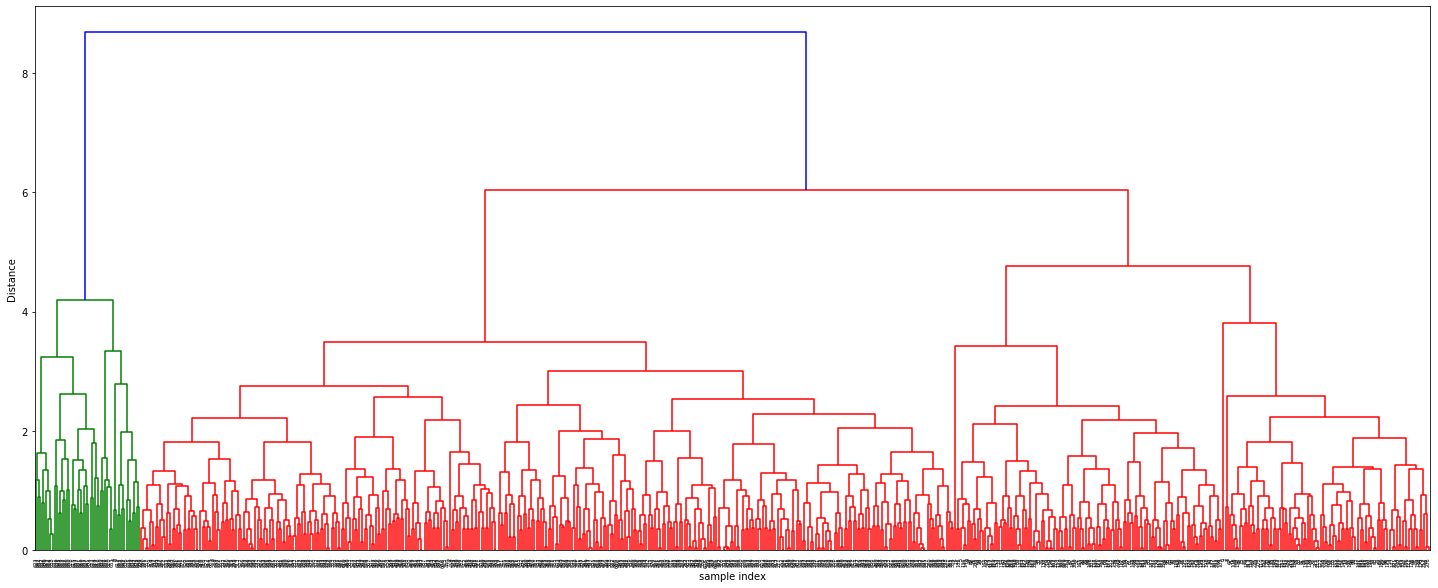

In [202]:
plt.figure(figsize=(25, 10))
dendrogram(z_complete)
plt.xlabel('sample index')
plt.ylabel('Distance')
plt.show()

#### got to truncate the dendrogram

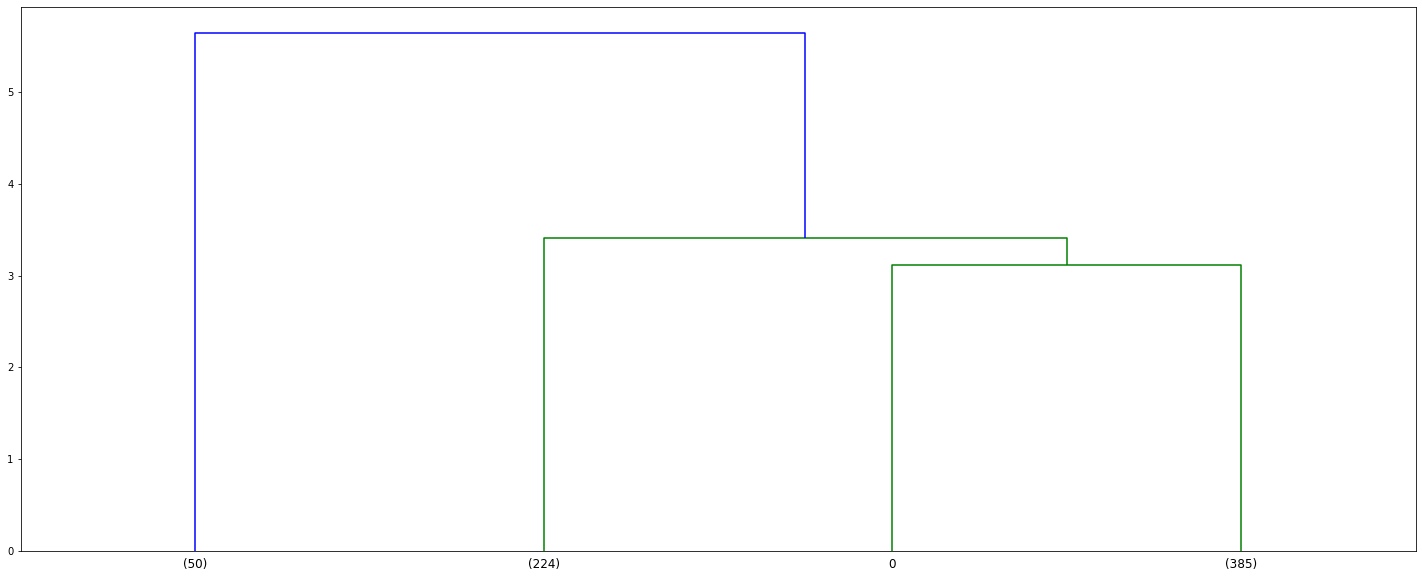

In [203]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    z_average,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

#### use this distance max_d and fcluster function to cluster the data into 3 different groups

In [204]:
#max_d=4
from scipy.cluster.hierarchy import fcluster
clusters_4 = fcluster(z_average, 4, criterion='distance')


In [205]:
#max_d=3
clusters_3 = fcluster(z_average, 3, criterion='distance')


In [206]:
#max_d=3
clusters_3_5 = fcluster(z_average, 3.5, criterion='distance')


#####  Dendrogram with average linkage -truncate mode=level

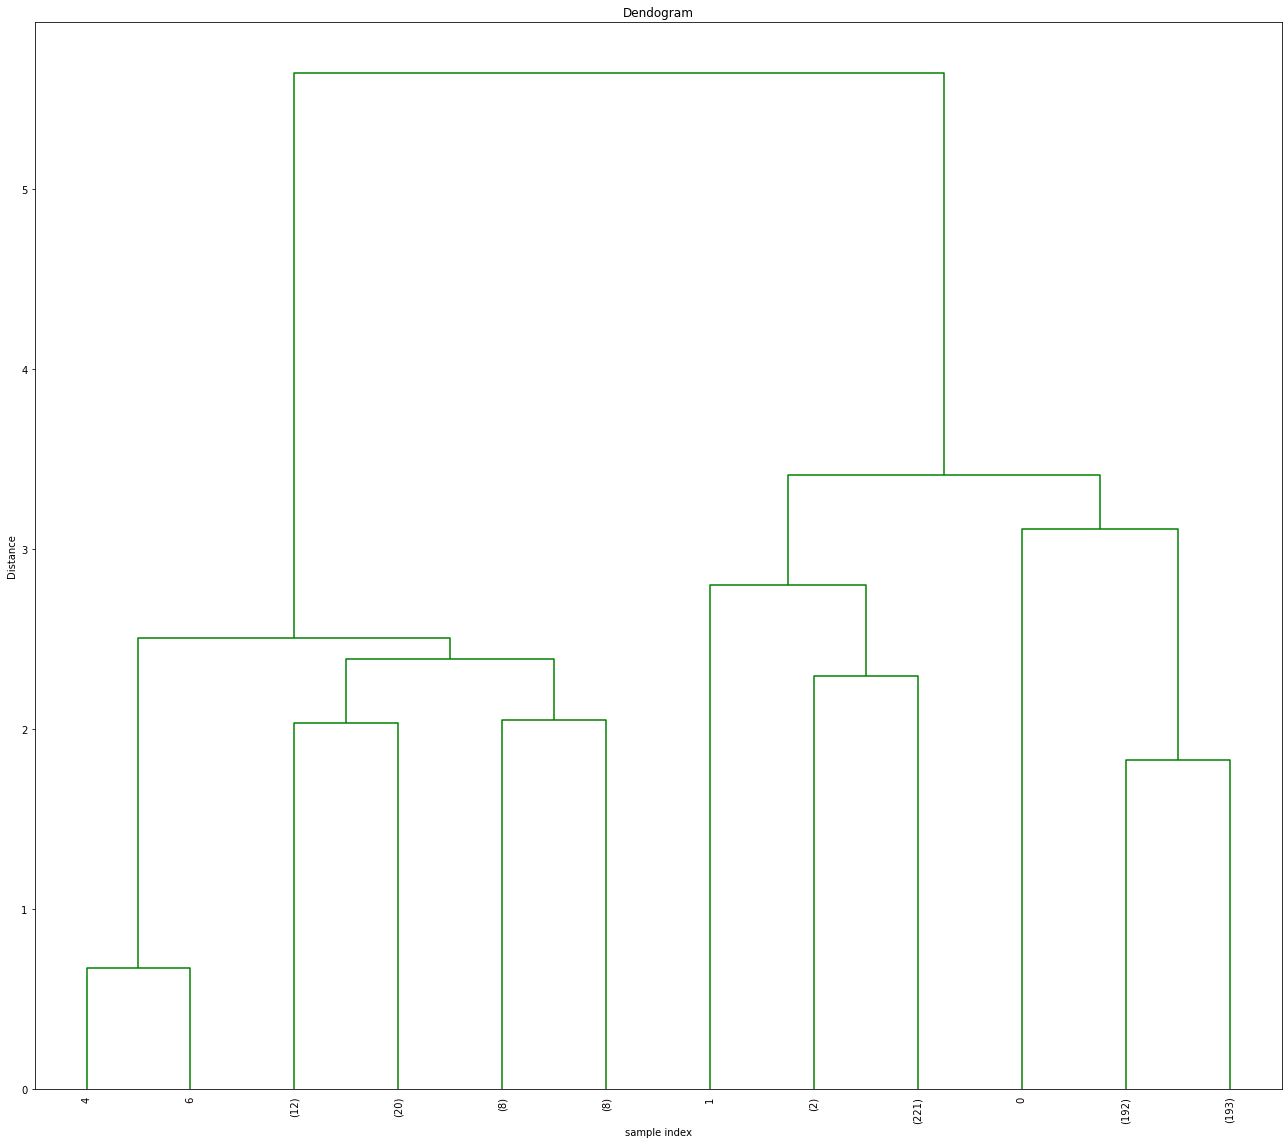

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 16))
plt.title('Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
max_d=3
dendrogram(z_average,leaf_rotation=90.0,p=max_d,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

#### box plot for heirarchial clustering for clusters

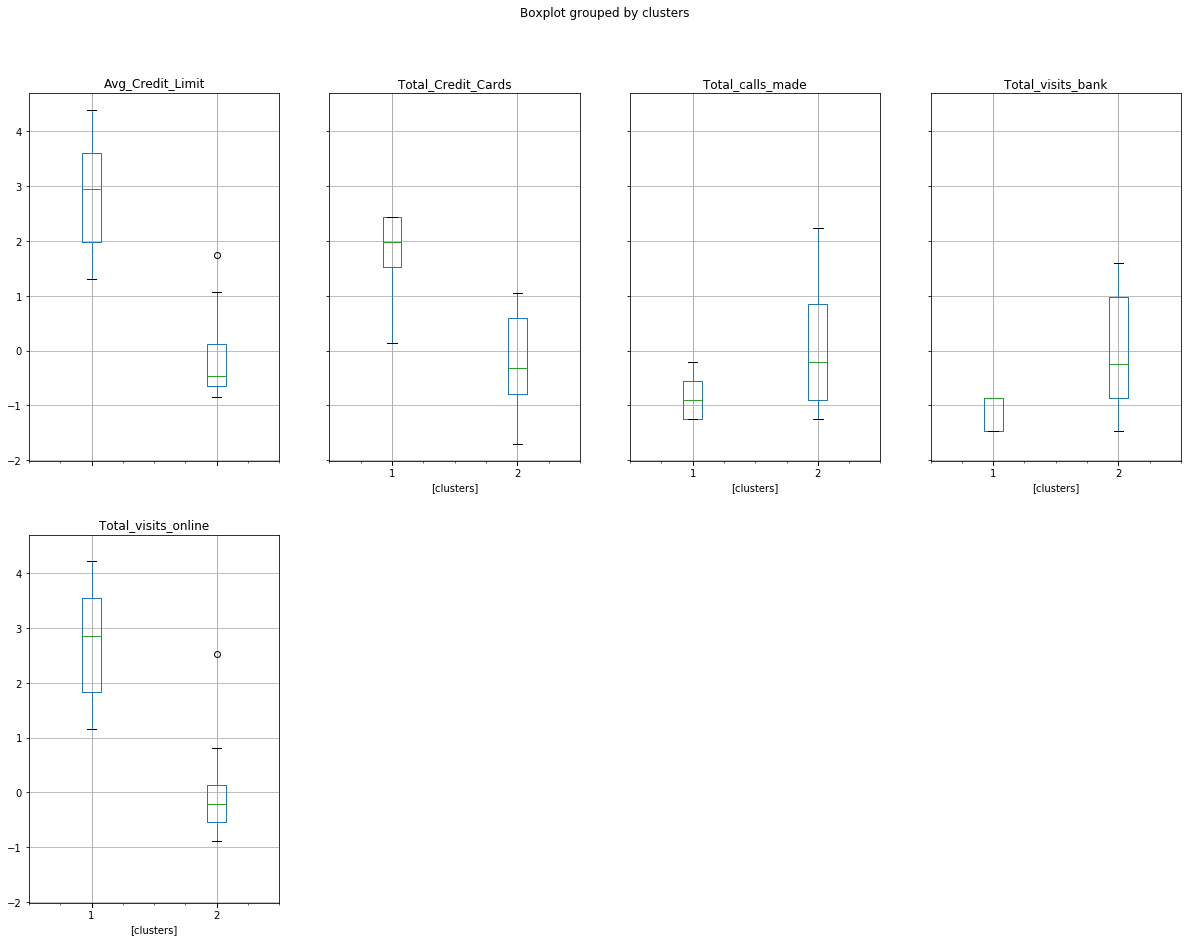

In [208]:
# add clusters to scaled dataframe
data_scaled_with_clusters_4=pd.DataFrame(data_scaled,columns=data_scaled.columns)
data_scaled_with_clusters_4['clusters']=clusters_4

# add clusters to original dataframe
data_orig_with_clusters_4=pd.DataFrame(data,columns=data.columns)
data_orig_with_clusters_4['clusters']=clusters_4

# drop the previous labels columns
data_scaled_with_clusters_4.drop(columns=['labels'],inplace=True)
data_scaled_with_clusters_4
data_scaled_with_clusters_4.boxplot(by = 'clusters',  layout=(2,4), figsize=(20, 15));

In [209]:
heirach_cluster_4=data_orig_with_clusters_4.copy()
heirach_cluster_4

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


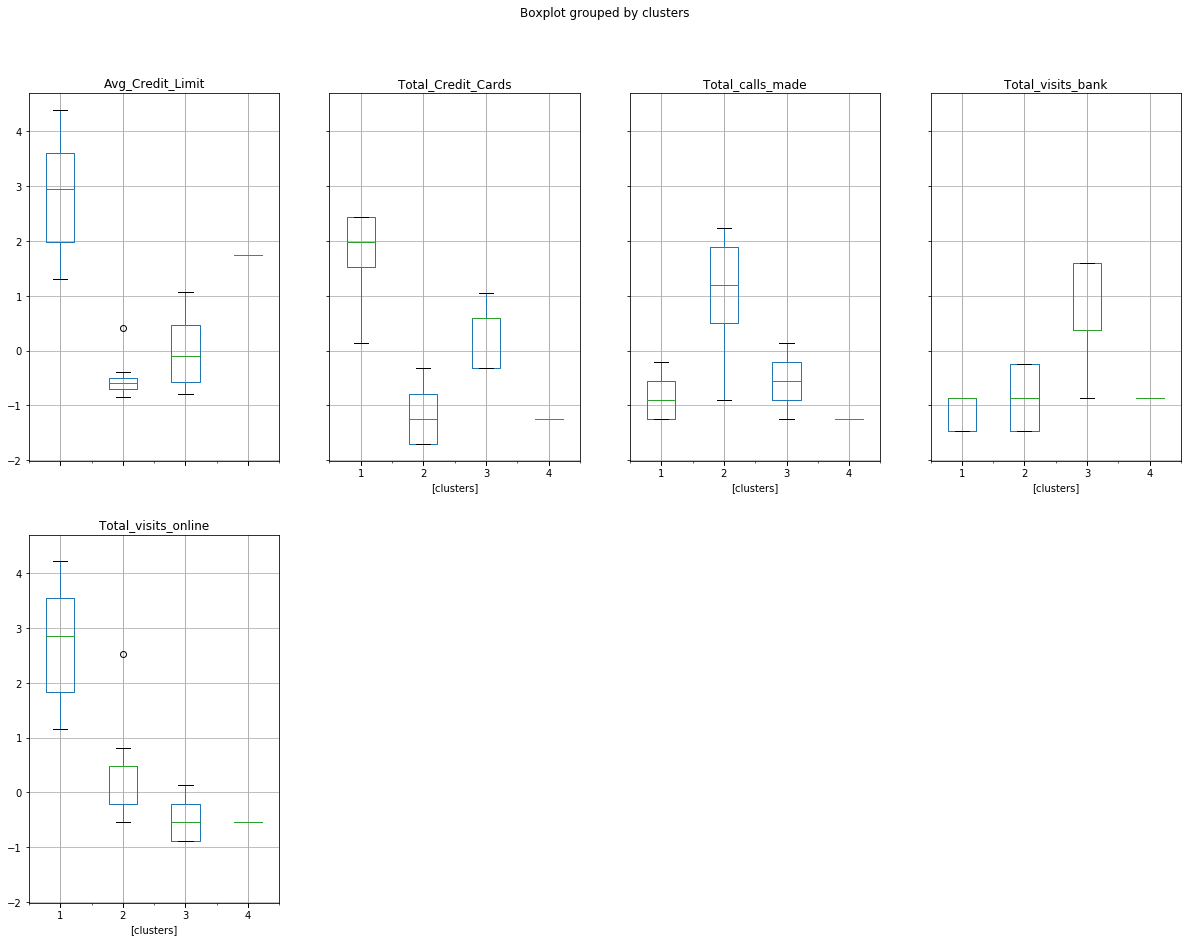

In [210]:
# add clusters to scaled dataframe
data_scaled_with_clusters_3=pd.DataFrame(data_scaled,columns=data_scaled.columns)
data_scaled_with_clusters_3['clusters']=clusters_3

# add clusters to original dataframe
data_orig_with_clusters_3=pd.DataFrame(data,columns=data.columns)
data_orig_with_clusters_3['clusters']=clusters_3

# drop the previous labels columns
data_scaled_with_clusters_3.drop(columns=['labels'],inplace=True)
data_scaled_with_clusters_3
data_scaled_with_clusters_3.boxplot(by = 'clusters',  layout=(2,4), figsize=(20, 15));

In [211]:
heirarch_cluster_3=data_orig_with_clusters_3.copy()
heirarch_cluster_3

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,100000,2,1,1,0,4
1,50000,3,0,10,9,2
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


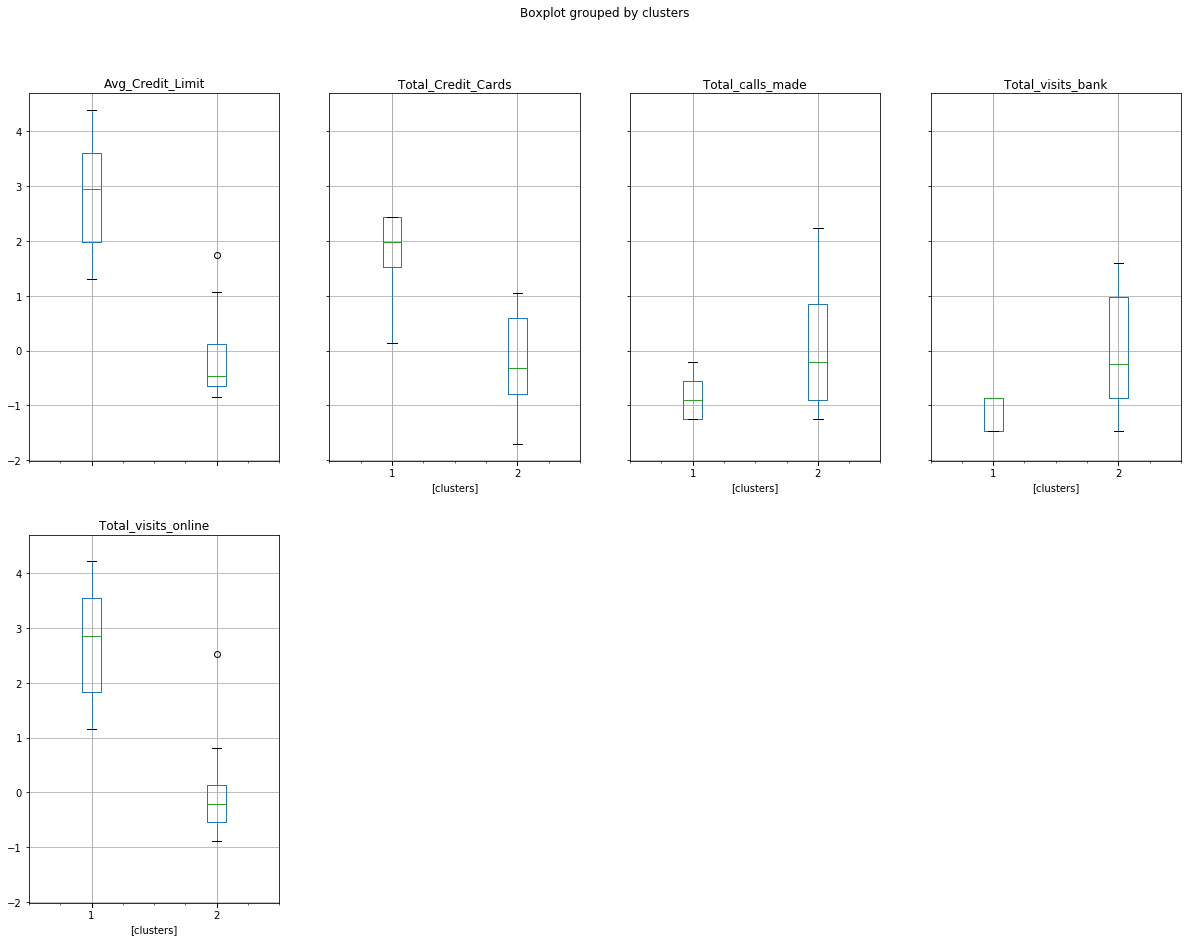

In [212]:
# add clusters to scaled dataframe
data_scaled_with_clusters_3_5=pd.DataFrame(data_scaled,columns=data_scaled.columns)
data_scaled_with_clusters_3_5['clusters']=clusters_3_5

# add clusters to original dataframe
data_orig_with_clusters_3_5=pd.DataFrame(data,columns=data.columns)
data_orig_with_clusters_3_5['clusters']=clusters_3_5

# drop the previous labels columns
data_scaled_with_clusters_3_5.drop(columns=['labels'],inplace=True)
data_scaled_with_clusters_3_5
data_scaled_with_clusters_3_5.boxplot(by = 'clusters',  layout=(2,4), figsize=(20, 15));

In [213]:
heirarch_cluster_3_5=data_orig_with_clusters_3_5.copy()
heirarch_cluster_3_5

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,100000,2,1,1,0,2
1,50000,3,0,10,9,2
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
...,...,...,...,...,...,...
655,99000,10,1,10,0,1
656,84000,10,1,13,2,1
657,145000,8,1,9,1,1
658,172000,10,1,15,0,1


#### 7. Calculate average silhouette score for both methods

In [214]:
# Calculate Avg Silhoutte Score for heirarchial clustering
print('silhouette score for heirarchial clustering with 4: ',silhouette_score(data_scaled, clusters_4))
print('silhouette score for heirarchial clustering with 3: ',silhouette_score(data_scaled, clusters_3))

silhouette score for heirarchial clustering with 4:  0.5796564169268956
silhouette score for heirarchial clustering with 3:  0.49195651147166247


In [215]:
# Calculate Avg Silhoutte Score for kmeans clustering
print('silhouette score for kmeans: ',silhouette_score(data_scaled, prediction))

silhouette score for kmeans:  0.5403577033986953


#### 8. Compare Kmeans with Heirarchial clusters

In [216]:
# Kmeans
data_labelled.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [217]:
#Heirarchical with max_distance 4 
heirach_cluster_4.groupby('clusters').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
clusters,,,,,
1,141040.000000,8.74000,0.60000,10.90000,1.080000
2,25847.540984,4.37541,2.55082,1.92623,3.788525


In [218]:
#Heirarchical with max_distance 3
heirarch_cluster_3.groupby('clusters').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
clusters,,,,,
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536
3,33610.389610,5.524675,3.496104,0.981818,2.005195
4,100000.000000,2.000000,1.000000,1.000000,0.000000


In [219]:
#Heirarchical with max_distance 3.5 this is just a test to see any diffference possible
heirarch_cluster_3_5.groupby('clusters').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
clusters,,,,,
1,141040.000000,8.74000,0.60000,10.90000,1.080000
2,25847.540984,4.37541,2.55082,1.92623,3.788525


#### 9. Cluster Analysis and inference

##### Inference &  recommendations:

In [220]:
So K-Means looks like is the winner as it provides a fit for purpose 3 cluster segmentation and helps to target 
the people who falls in those segments. 

SyntaxError: invalid syntax (<ipython-input-220-02f12b5ac012>, line 1)

##### A. There seems to be 3 prominent segments.
##### B. The segments differ as there is a:<br>
1.high credit limit group who has more credit cards and  prefer online mode, and <br>
2.And medium group with medium credit limit group and has more than one credit card and prefer bank visits/calls<br>
3.Low credit limit group who has fewer credit cards and prefer phone calls
##### C. Looks like it is better to target the  high credit limit group in an online mode. And the other two groups need more personal approach either through phone calls or see in person if possible.